In [1]:
from __future__ import division

import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

class Perceptron:
    def __init__(self, number_of_inputs, threshold, learning_rate):        
        self.number_of_inputs = number_of_inputs
        self.threshold = threshold
        self.learning_rate = learning_rate        
        self._initialize_weigths()

        Perceptron.ONE = np.array([[1]])

    def _initialize_weigths(self):
        self.weights = np.reshape(np.zeros(self.number_of_inputs+1), (self.number_of_inputs+1,1))

    def activate(self, input_signal):
        return self._activate(np.concatenate((Perceptron.ONE, input_signal), axis=1))
        
    def _activate(self, input_signal):
        output_signal = np.dot(input_signal, self.weights)
        
        if output_signal > self.threshold:
            return 1
        elif output_signal < -self.threshold:
            return -1        
        return 0

    def train(self, training_set, number_of_epochs):
        
        number_of_patterns = training_set.shape[0]
        
        self._initialize_weigths()
        for i in xrange(number_of_epochs):             
            for j in np.arange(number_of_patterns):                
                input_signal = np.concatenate((Perceptron.ONE, training_set[j,:-1,None].T), axis=1)
                target = training_set[j,-1]
                
                output_signal = self._activate(input_signal)
                if output_signal != target:
                    self.weights += self.learning_rate*target*input_signal.T

In [16]:
# Creating the training data
np.random.seed(15)
number_training_data = 400

negative_indices = np.arange(200);
positive_indices = np.arange(200,400);

covariance = 0.09
training_set = np.random.multivariate_normal([-1,-1],covariance*np.eye(2),number_training_data)
training_set[100:200,] += 2.5
training_set[200:300,0] += 2.5
training_set[300:400,1] += 2.5

training_target = np.ones((number_training_data))
training_target[negative_indices] = -1
training_set = np.column_stack((training_set, training_target))

In [20]:
perceptron = Perceptron(2,0,0.15)
print "Number of inputs: " + str(perceptron.number_of_inputs)
print "Threshold: " + str(perceptron.threshold)
print "Learning rate: " + str(perceptron.learning_rate)

number_of_epochs = 10000
perceptron.train(training_set, number_of_epochs)

Number of inputs: 2
Threshold: 0
Learning rate: 0.15


In [21]:
# Creacion del meshgrid para las curvas de nivel de los limites de decisión
delta = 0.00625
lower_left_corner = np.min(training_set[:,:-1])-20*delta
upper_right_corner = np.max(training_set[:,:-1])+20*delta
x1 = np.arange(lower_left_corner,upper_right_corner, delta)
x1, x2 = np.meshgrid(x1, x1)

yPerceptron = np.zeros(shape=np.shape(x1))
for i in xrange(np.shape(x1)[0]):
    for j in xrange(np.shape(x1)[1]):
        yPerceptron[i,j] = perceptron.activate(np.array([[x1[i,j]],[x2[i,j]]]).T)

mlp21 = np.zeros(shape=np.shape(training_target))
for i in xrange(training_target.shape[0]):
    mlp21[i] = perceptron.activate(training_set[i,:-1,None].T)

    
mlp21_prediction = np.round(mlp21)==training_target
true_pred_indices = np.nonzero(mlp21_prediction==True)[0]

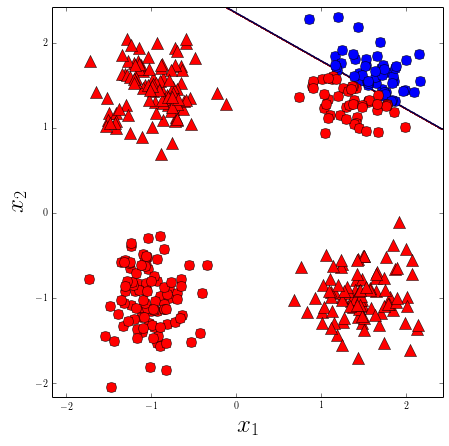

In [22]:
fig = plt.figure(figsize=(7,7))
levels = np.arange(-0.010, 1.010, 0.05)
plt.contour(yPerceptron, levels, origin='lower',linewidths=0.85, cmap=plt.get_cmap('seismic'), extent=(lower_left_corner,upper_right_corner,lower_left_corner,upper_right_corner))
CS = plt.contour(yPerceptron, [0], linewidths=1.25, cmap=plt.get_cmap('seismic'), extent=(lower_left_corner,upper_right_corner,lower_left_corner,upper_right_corner))

# fmt = {}
# for l,s in zip( CS.levels, [r'L\'imite de decisi\'on'] ):
#     fmt[l] = s
# plt.clabel(CS,CS.levels[::2],inline=True,fmt=fmt,fontsize=20, manual=[(1.3,-0.3),(1,1)])

trueNegIndices = np.intersect1d(negative_indices, true_pred_indices);
truePosIndices = np.intersect1d(positive_indices, true_pred_indices);
falseNegIndices = np.setdiff1d(positive_indices, truePosIndices);
falsePosIndices = np.setdiff1d(negative_indices, trueNegIndices);

plt.plot(training_set[trueNegIndices,0],training_set[trueNegIndices,1],'b',marker='o',markersize=10,linestyle='None');
plt.plot(training_set[truePosIndices,0],training_set[truePosIndices,1],'r',marker='^',markersize=12,linestyle='None');
plt.plot(training_set[falseNegIndices,0],training_set[falseNegIndices,1],'b',marker='^',markersize=12,linestyle='None');
plt.plot(training_set[falsePosIndices,0],training_set[falsePosIndices,1],'r',marker='o',markersize=10,linestyle='None');


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel(r'$x_1$',fontsize=25)
plt.ylabel(r'$x_2$',fontsize=25)

# fig.savefig('Inteligencia Artificial/images/mlp231.eps',bbox_inches='tight', transparent=True)#, pad_inches=0)
